In [1]:
import h5py
import numpy as np
import keras
from keras.engine.topology import Layer, InputSpec
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import backend as K
import random
import plotting
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import expit
from sklearn.metrics import roc_curve, auc
from keras.utils import plot_model

Using TensorFlow backend.


In [ ]:
input_img = Input(shape=(32*32,))
layer =  Dense(32, activation='relu')(input_img)
#layer =  Dense(2048, activation='relu')(layer) 
encoded = Dense(6, activation='relu')(layer)

#layer = Dense(2048, activation='relu')(encoded)
layer = Dense(32, activation='relu')(layer)
decoded = Dense(32*32, activation='relu')(layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(metrics=['accuracy'],loss=keras.losses.mean_squared_error, 
                    optimizer=keras.optimizers.Adam())
autoencoder.summary()
autoencoder.save_weights('init.h5')
plot_model(autoencoder, to_file='densem.png', show_shapes=True)

In [3]:
f = h5py.File('./data/train_no_pile_100000a.h5','r')
x,y = f['features'][:], f['targets'][:]
ibg, isig = np.where(y == 0)[0], np.where(y == 1)[0]
xbg, ybg = x[ibg], y[ibg]
xsig, ysig = x[isig], y[isig]

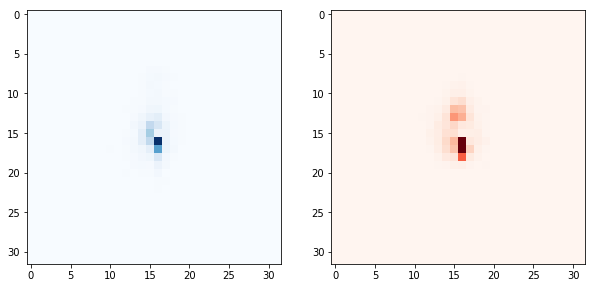

In [4]:
plotting.plot2_nAgg(0,1000,xbg,xsig,100*400,"traindata.png")

In [5]:
ft = h5py.File('./data/test_no_pile_50000a.h5','r')
xt,yt = ft['features'][:], ft['targets'][:]
ibgt, isigt = np.where(yt == 0)[0], np.where(yt == 1)[0]
xbgt, ybgt = xt[ibgt], yt[ibgt]
xsigt, ysigt = xt[isigt], yt[isigt]

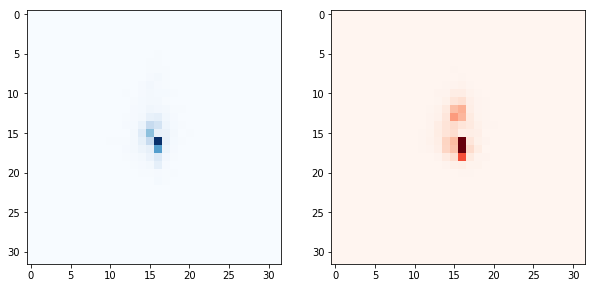

In [6]:
plotting.plot2_nAgg(0,1000,xbgt,xsigt,100*400,"testdata.png")

In [7]:
print(xbg.shape,ybg.shape,xsig.shape,ysig.shape)
print(xbgt.shape,ybgt.shape,xsigt.shape,ysigt.shape)

(50060, 1, 32, 32) (50060, 1) (49940, 1, 32, 32) (49940, 1)
(24925, 1, 32, 32) (24925, 1) (25075, 1, 32, 32) (25075, 1)


In [8]:
#xbg_tr; xbg_val; xbg_te
xbg_tr,ybg_tr=xbg[:40000],ybg[:40000]
xbg_val,ybg_val=xbg[40000:],ybg[40000:]
xsig_tr,ysig_tr=xsig[:40000],ysig[:40000]
xsig_val,ysig_val=xsig[40000:],ysig[40000:]
xbg_te,ybg_te = xbgt[:],ybgt[:]
xsig_te,ysig_te = xsigt[:],ysigt[:]

def flat(x):
    return x.reshape(x.shape[0],-1)

xbg_tr = flat(xbg_tr)
xbg_val = flat(xbg_val)
xsig_tr = flat(xsig_tr)
xsig_val = flat(xsig_val)
xbg_te = flat(xbgt)
xsig_te = flat(xsigt)


print(xbg_tr.shape,ybg_tr.shape,xsig_tr.shape,ysig_tr.shape)
print(xbg_val.shape,ybg_val.shape,xsig_val.shape,ysig_val.shape)
print(xbg_te.shape,ybg_te.shape,xsig_te.shape,ysig_te.shape)

(40000, 1024) (40000, 1) (40000, 1024) (40000, 1)
(10060, 1024) (10060, 1) (9940, 1024) (9940, 1)
(24925, 1024) (24925, 1) (25075, 1024) (25075, 1)


In [35]:
# acc does not provide useful info; it gives k-top acc
autoencoder.load_weights('init.h5')
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, 
                                           patience=10, verbose=0,
                                           mode='auto', baseline=None,
                                           restore_best_weights=True)]

historya = autoencoder.fit(xbg_tr, xbg_tr, epochs=200, batch_size=128,
                validation_data=(xbg_val,xbg_val),verbose=1,
                callbacks=callbacks)

Train on 40000 samples, validate on 10060 samples
Epoch 1/200
40000/40000 [==============================] - 1s 25us/step - loss: 7.3493 - acc: 0.9098 - val_loss: 2.1052 - val_acc: 0.9483
Epoch 2/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.7907 - acc: 0.9619 - val_loss: 1.6295 - val_acc: 0.9670
Epoch 3/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.5038 - acc: 0.9677 - val_loss: 1.4509 - val_acc: 0.9680
Epoch 4/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.4140 - acc: 0.9690 - val_loss: 1.4059 - val_acc: 0.9699
Epoch 5/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.3838 - acc: 0.9711 - val_loss: 1.3814 - val_acc: 0.9706
Epoch 6/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.3639 - acc: 0.9722 - val_loss: 1.3671 - val_acc: 0.9721
Epoch 7/200
40000/40000 [==============================] - 1s 25us/step - loss: 1.3522 - acc: 0.9728 - val_loss: 1.3570 - 

40000/40000 [==============================] - 1s 26us/step - loss: 1.3081 - acc: 0.9750 - val_loss: 1.3134 - val_acc: 0.9744
Epoch 60/200
40000/40000 [==============================] - 1s 26us/step - loss: 1.3078 - acc: 0.9750 - val_loss: 1.3132 - val_acc: 0.9744
Epoch 61/200
40000/40000 [==============================] - 1s 27us/step - loss: 1.3075 - acc: 0.9751 - val_loss: 1.3131 - val_acc: 0.9746
Epoch 62/200
40000/40000 [==============================] - 1s 27us/step - loss: 1.3077 - acc: 0.9750 - val_loss: 1.3136 - val_acc: 0.9749
Epoch 63/200
40000/40000 [==============================] - 1s 27us/step - loss: 1.3075 - acc: 0.9752 - val_loss: 1.3134 - val_acc: 0.9743
Epoch 64/200
40000/40000 [==============================] - 1s 26us/step - loss: 1.3076 - acc: 0.9750 - val_loss: 1.3132 - val_acc: 0.9751
Epoch 65/200
40000/40000 [==============================] - 1s 27us/step - loss: 1.3077 - acc: 0.9750 - val_loss: 1.3134 - val_acc: 0.9746
Epoch 66/200
40000/40000 [==============

In [36]:
autoencoder.save_weights('dense106p2b128.h5')

In [37]:
autoencoder.evaluate(xbg_te,xbg_te,batch_size=128)

24925/24925 [==============================] - 0s 12us/step


[1.2521082553366123, 0.9763289868532714]

In [38]:
autoencoder.evaluate(xsig_te,xsig_te,batch_size=128)

25075/25075 [==============================] - 0s 12us/step


[5.157314957859271, 0.9162911266700577]

In [39]:
imbg = autoencoder.predict(xbg_te,batch_size=128)
imsig = autoencoder.predict(xsig_te,batch_size=128)

In [40]:
print(imbg.shape,imsig.shape)

(24925, 1024) (25075, 1024)


In [41]:
for i in random.sample(range(1,24000),10):
    print("Sneak at random 10 bg/sig loss")
    print("Background testing:",np.sum((xbg_te[i]-imbg[i])**2)/(xbg_te.shape[1]))
    print("Signal testing:",np.sum((xsig_te[i]-imsig[i])**2)/(xsig_te.shape[1]))

Sneak at random 10 bg/sig loss
Background testing: 0.0010350870434194803
Signal testing: 1.4979783296585083
Sneak at random 10 bg/sig loss
Background testing: 0.25525280833244324
Signal testing: 0.2011270523071289
Sneak at random 10 bg/sig loss
Background testing: 1.785253643989563
Signal testing: 0.22214171290397644
Sneak at random 10 bg/sig loss
Background testing: 0.017471326515078545
Signal testing: 1.1660770177841187
Sneak at random 10 bg/sig loss
Background testing: 5.391115188598633
Signal testing: 22.431312561035156
Sneak at random 10 bg/sig loss
Background testing: 0.00850826408714056
Signal testing: 4.14883279800415
Sneak at random 10 bg/sig loss
Background testing: 8.048612594604492
Signal testing: 2.4759559631347656
Sneak at random 10 bg/sig loss
Background testing: 0.37291577458381653
Signal testing: 1.2422308921813965
Sneak at random 10 bg/sig loss
Background testing: 0.00023783739015925676
Signal testing: 0.00830095261335373
Sneak at random 10 bg/sig loss
Background test

In [42]:
print("Background testing:",np.sum((xbg_te[0]-imbg[0])**2)/(xbg_te.shape[1]))

Background testing: 0.9864522218704224


In [43]:
def nAgg(s,e,x,x_hat):
    oga = np.copy(x[s].reshape((32,32)))
    imga = np.copy(x_hat[s].reshape((32,32)))
#     f, ax = plt.subplots(1, 2, figsize=(10, 10))
#     ax[0].imshow(oga,cmap="Blues")
#     ax[0].set_title("Original")
#     ax[1].imshow(imga , cmap="Blues")
#     ax[1].set_title("Reconstructed")
#     plt.show()    
    for i in range(s+1,e):
        og = np.reshape(x[i],(32,32))
        img = np.reshape(x_hat[i],(32,32))
        oga += og
        imga += img
        
    return oga, imga

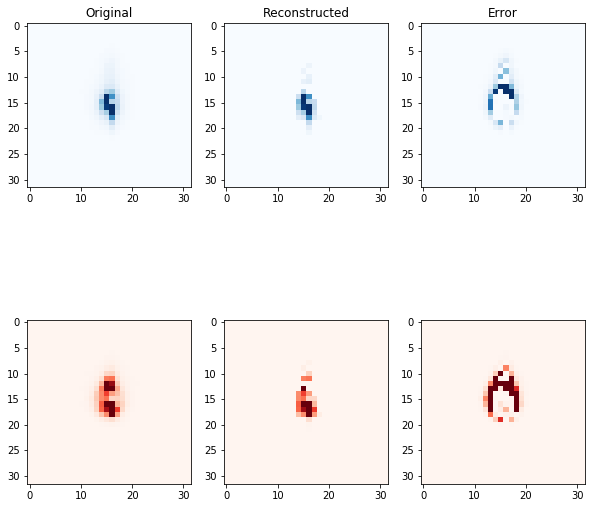

In [44]:
ogbg,imgbg = nAgg(0,10000,xbg_te,imbg)
ogsig,imgsig = nAgg(0,10000,xsig_te,imsig)

f, ax = plt.subplots(2, 3, figsize=(10, 10))
ax[0][0].imshow(ogbg,cmap="Blues", vmax=100000)
ax[0][0].set_title("Original")
ax[0][1].imshow(imgbg , cmap="Blues" , vmax=100000)
ax[0][1].set_title("Reconstructed")
ax[0][2].imshow((ogbg-imgbg)**2/(32*32) , cmap="Blues", vmax=100000)
ax[0][2].set_title("Error")

ax[1][0].imshow(ogsig,cmap="Reds" , vmax=100000)
ax[1][1].imshow(imgsig , cmap="Reds" , vmax=100000)
ax[1][2].imshow((ogsig-imgsig)**2/(32*32) , cmap="Reds", vmax=100000)
0
plt.savefig("dae.png")
plt.show()

In [45]:
list(historya.history.keys())

['val_loss', 'val_acc', 'loss', 'acc']

In [46]:
def plot_al(history,aorl):
    plt.plot(history.history[aorl])
    plt.plot(history.history['val_'+aorl])
    plt.title('Dense Autoencoder '+("Accuracy" if aorl=="acc" else "Loss"))
    plt.ylabel(aorl)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

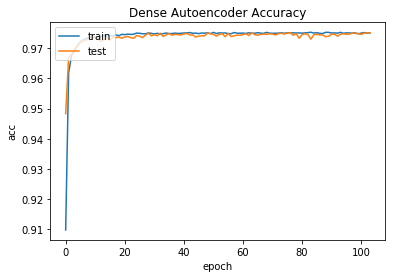

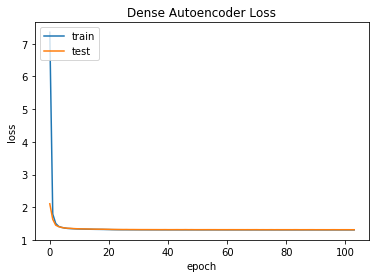

In [47]:
# batch=128
plot_al(historya,'acc')
plot_al(historya,'loss')

In [48]:
xmixed = np.concatenate((xbg_te,xsig_te))
ymixed = np.concatenate((ybg_te,ysig_te))

In [49]:
print(xmixed.shape,ymixed.shape)

(50000, 1024) (50000, 1)


In [50]:
imall = autoencoder.predict(xmixed,batch_size=128)

In [51]:
imall.shape

(50000, 1024)

In [52]:
def evaluate(x,img):
    err = np.sum((x-img)**2)/(x.shape[0])
    #print(expit((err-65)/10))
    return expit(err-1.6), err

In [53]:
def preRoc(xs,x_hats):
    y_preds = []
    errs = []
    for i in range(xmixed.shape[0]):
        y_pred, errx = evaluate(xs[i],x_hats[i])
        y_preds.append(y_pred)
        errs.append(errx)
        
    #print(y_preds)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(ymixed.reshape(ymixed.shape[0]), 
                                      np.array(y_preds))
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    return fpr,tpr,roc_auc, errs, y_preds

{0: 0.7701099965899693, 1: 0.7701099965899693}


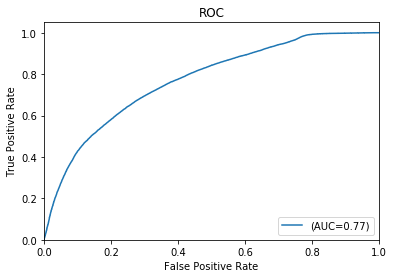

In [54]:
plt.figure()   
fpr,tpr,roc_auc,errs,y_preds = preRoc(xmixed,imall)
plt.plot(fpr[1], tpr[1],label="(AUC={:.2f})".format(roc_auc[0]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("daeroc.png")
plt.show()

In [55]:
errs = np.array(errs)
print(errs[:imbg.shape[0]].mean())
print(errs[imbg.shape[0]:].mean())
print(errs[0])

1.2521082541105053
5.157314958664053
0.9864522218704224


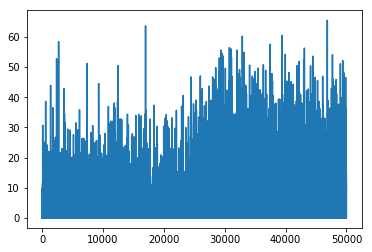

In [56]:
plt.figure()
plt.plot(errs)

In [57]:
y_preds = np.array(y_preds)
print(y_preds[:imbg.shape[0]].mean())
print(y_preds[imbg.shape[0]:].mean())
print(y_preds[1])

0.31450361569290125
0.6060758116174911
0.1843452457583475


In [58]:
errs[46864]

65.50228881835938

In [59]:
y_preds[46864]

1.0

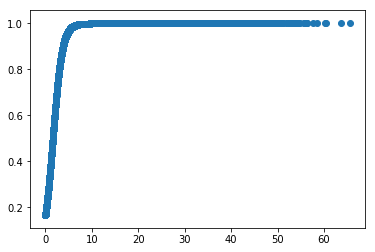

In [60]:
plt.figure()
plt.scatter(errs,y_preds)

In [76]:
def writePred(h5,ymixed,y_preds):
    hf = h5py.File(h5, 'w')
    ymixed = ymixed.reshape(ymixed.shape[0])
    assert ymixed.shape == y_preds.shape
    hf.create_dataset('y', data=ymixed)
    hf.create_dataset('y_pred', data=y_preds)
    hf.close()

In [78]:
writePred("densepred.h5",ymixed,y_preds)

In [80]:
ff = h5py.File('./densepred.h5','r')
ymixedd,y_predd = ff['y'][:], ff['y_pred'][:]
print(ymixedd.shape,y_predd.shape)

(50000,) (50000,)


In [81]:
fprr = dict()
tprr = dict()
roc_aucc = dict()
for i in range(2):
    fprr[i], tprr[i], _ = roc_curve(ymixedd, y_predd)
    roc_aucc[i] = auc(fprr[i], tprr[i])
print(roc_aucc)

{0: 0.7701099965899693, 1: 0.7701099965899693}


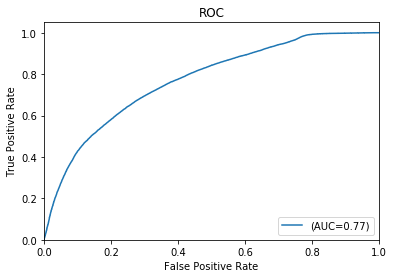

In [82]:
plt.plot(fprr[1], tprr[1],label="(AUC={:.2f})".format(roc_aucc[0]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig("daeroc.png")
plt.show()